# Random Forest Experinemtal Set-up

## Packages
Import packagers and helper functions:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_friedman1
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import json
from sklearn.dummy import DummyRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from utils_Nadja import FriedmanDataset, run_kfold_visualizer, ModelOptimizer 

## Parameters
Set all parameters for data creation and stratification and define the parameter grid for random search:

In [2]:
# Data Creation
n_train= 1000
n_test= 100000
n_features = 10
FD_noise= 0.5
transformation='sqrt'

# Stratification
n_groups = 10

# RandomSearchCV
n_folds = 10
n_iter= 200
n_repetitions= 200 #@nadja: not implemented yet
scoring= 'neg_mean_squared_error' 
n_jobs= -1
json_file = "./RF_results.json" # set path to save json-file 

RS_param_grid = {
    'n_estimators': np.arange(500, 1001),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': np.arange(1, n_features + 1) #@nadja is that right?
}

# Initalize Model
modelOptimizer = ModelOptimizer(RandomForestRegressor(random_state=42), RS_param_grid)

# Save Parameters in a dictionary
params = {'model': modelOptimizer.model.__class__.__name__,
          'n_train': n_train,
          'n_test': n_test,
          'n_features': n_features,
          'FD_noise': FD_noise,
          'transformation': transformation,
          'n_groups': n_groups,
          'n_folds': n_folds,
          'n_iter': n_iter,
          'n_repetitions': n_repetitions,
          'scoring': scoring, 
          'n_jobs': n_jobs,
          'json_file': json_file}
params

{'model': 'RandomForestRegressor',
 'n_train': 1000,
 'n_test': 100000,
 'n_features': 10,
 'FD_noise': 0.5,
 'transformation': 'sqrt',
 'n_groups': 10,
 'n_folds': 10,
 'n_iter': 200,
 'n_repetitions': 200,
 'scoring': 'neg_mean_squared_error',
 'n_jobs': -1,
 'json_file': './RF_results.json'}

## Data Set
Create training and testing data with FriedmanDataset:

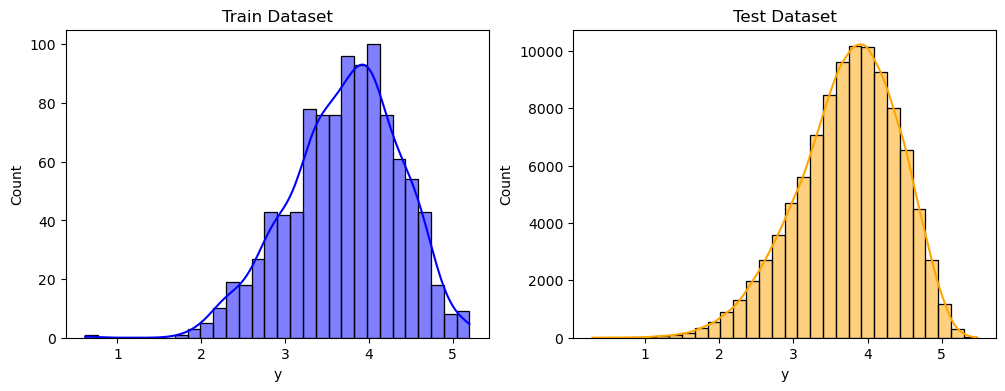

In [3]:
train = FriedmanDataset(n_samples=n_train, 
                            n_features=n_features, 
                            noise=FD_noise, 
                            random_state=42)
train.transform(transformation=transformation)

test = FriedmanDataset(n_samples=n_test,
                           n_features=n_features,
                           noise=FD_noise,
                           random_state=1718)
test.transform(transformation=transformation)


# Show here histograms of train and train datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train.df, x='y', bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Train Dataset')

sns.histplot(test.df, x='y', bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Test Dataset')

plt.show()

Visualize cross-validation splits with and without stratification:

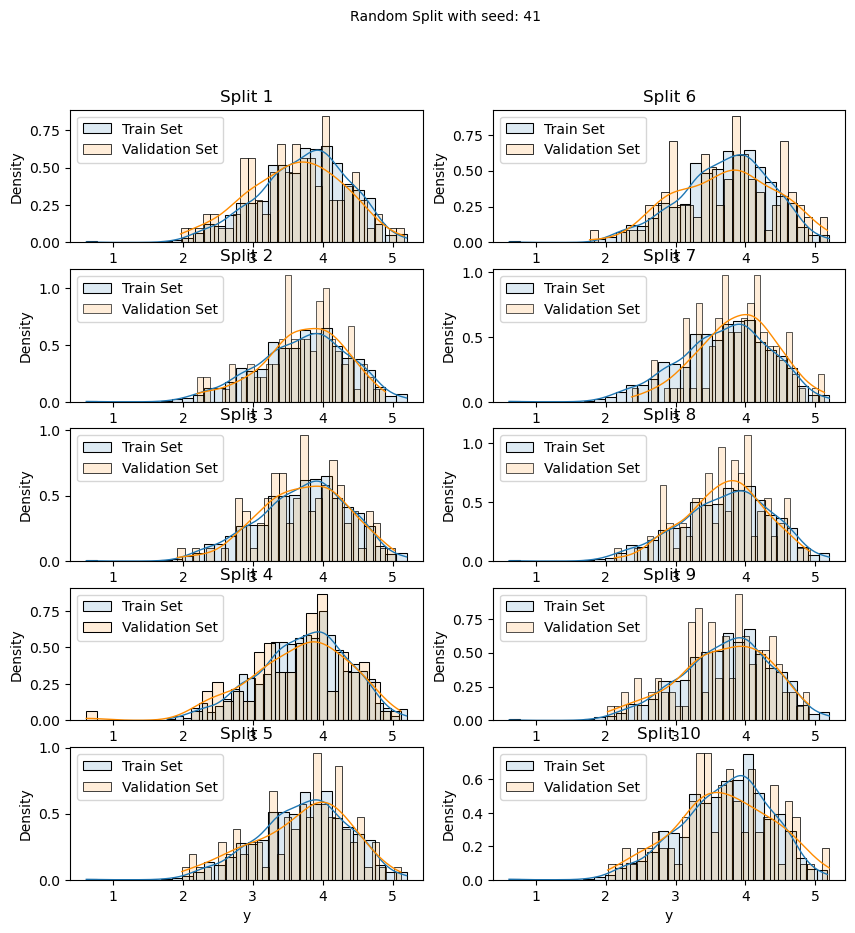

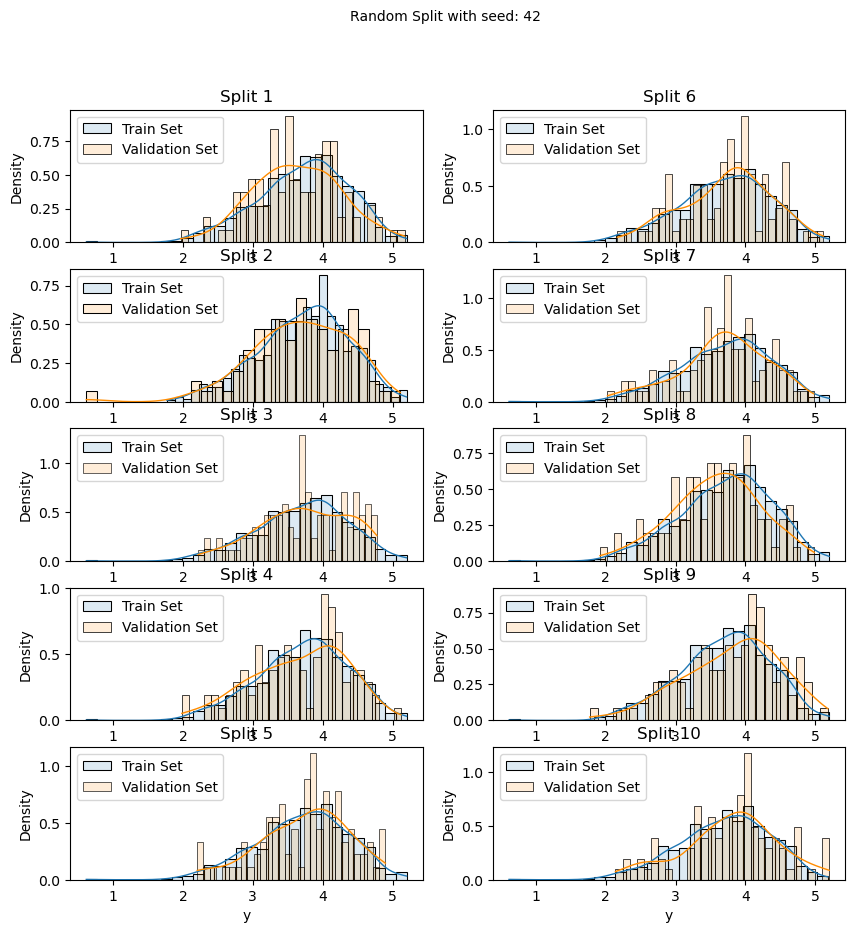

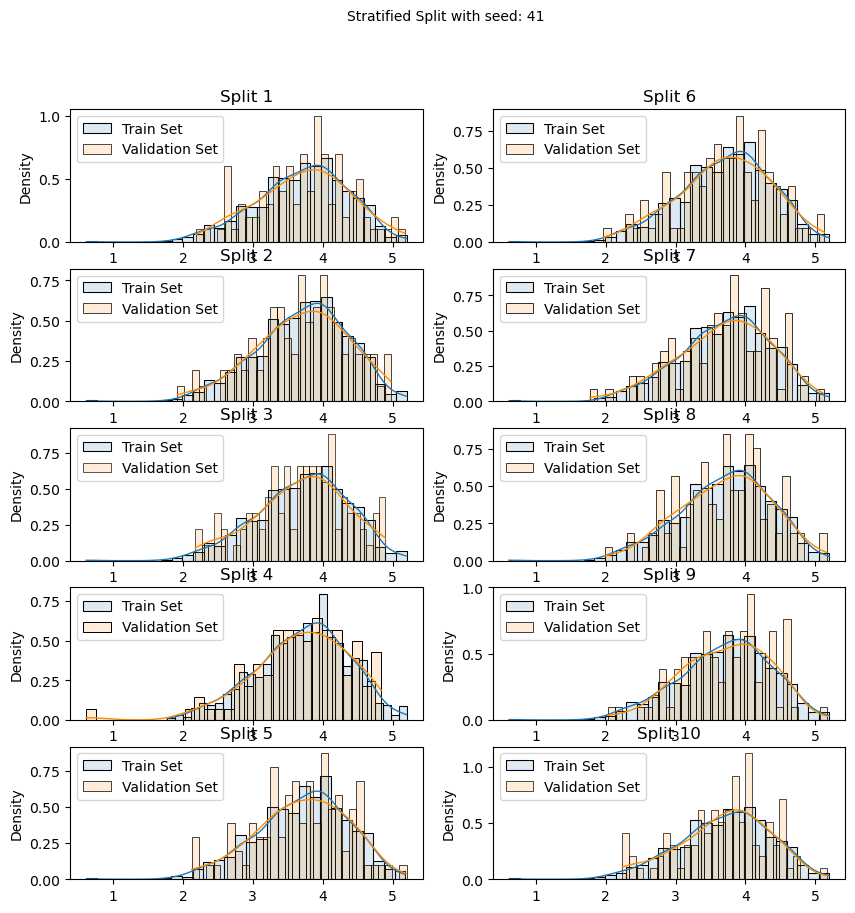

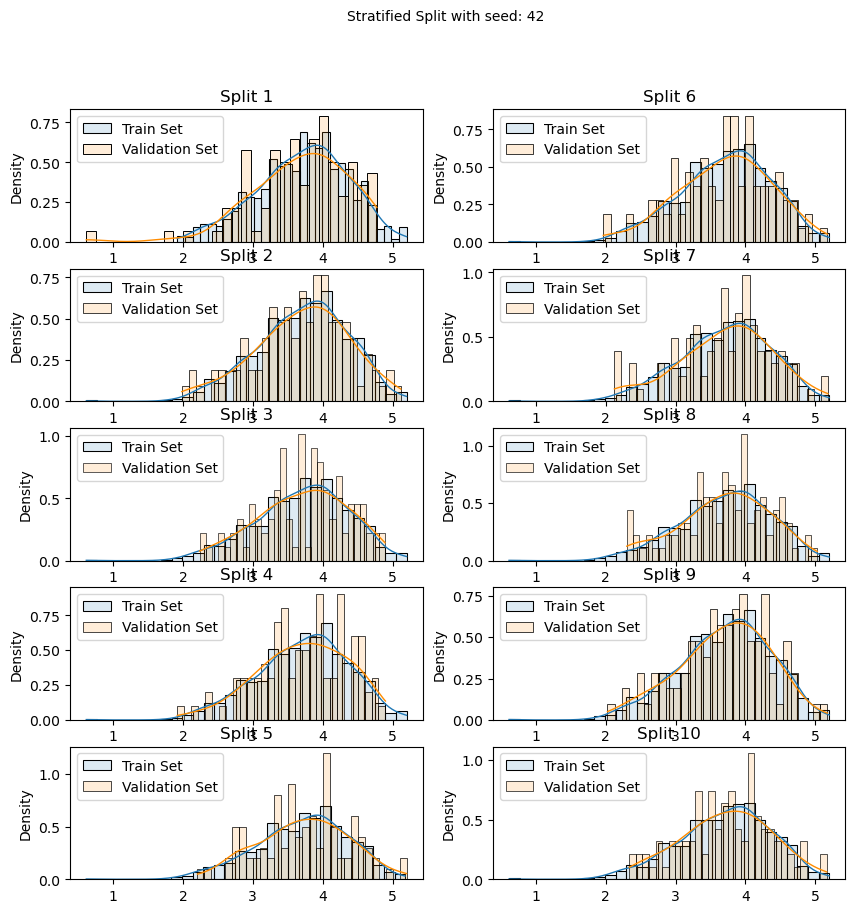

In [4]:
run_kfold_visualizer(labels=train.df.y, 
                     k= n_folds,
                     seeds=[41, 42], n_groups=n_groups, stratified=False)

run_kfold_visualizer(labels=train.y, 
                     k= n_folds,
                     seeds=[41, 42],n_groups=n_groups, 
                     stratified=True)

## Random Search
Hyperparameter tunign with Random Search and evaluation of best hyperparameters for stratified and random split respectively.

In [5]:
unstratified_results, stratified_results = modelOptimizer.optimize(train.features, 
                                                           train.y,
                                                           test.features,
                                                           test.y, params)

In the following RandomizesdSearchCV is don with n_folds = 10 , ngroups:  10 , scoring:  neg_mean_squared_error , n_jobs:  -1 , n_iter:  200  and save to   ./RF_results.json
Best Parameters: {'n_estimators': 875, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 6}
Evaluation Results of Random Split Cross-validation :  {'train r2': 0.9787, 'test r2': 0.8748, 'train mse': 0.0091, 'test mse': 0.0581, 'train mae': 0.0729, 'test mae': 0.1865}
Best Parameters: {'n_estimators': 875, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 6}
Evaluation Results of Stratified Split Cross-validation :  {'train r2': 0.9787, 'test r2': 0.8748, 'train mse': 0.0091, 'test mse': 0.0581, 'train mae': 0.0729, 'test mae': 0.1865}
